<a href="https://colab.research.google.com/github/charliesire/FunQuant/blob/main/short_example_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#remotes::install_github("CharlieSire/FunQuant") # when repo will becom public
remotes::install_local("FunQuant-main.zip") # once uploaded in colab path
#install.packages("FunQuant") # when released on CRAN

install.packages("randtoolbox")
install.packages("evd")

GpOutput2D   (NA -> 9f779d33f...) [GitHub]
Rcpp         (NA -> 1.0.10      ) [CRAN]
terra        (NA -> 1.7-3       ) [CRAN]
sp           (NA -> 1.6-0       ) [CRAN]
raster       (NA -> 3.6-14      ) [CRAN]
iterators    (NA -> 1.0.14      ) [CRAN]
randomForest (NA -> 4.7-1.1     ) [CRAN]
dismo        (NA -> 1.3-9       ) [CRAN]
foreach      (NA -> 1.5.2       ) [CRAN]
DiceKriging  (NA -> 1.6.0       ) [CRAN]
waveslim     (NA -> 1.8.4       ) [CRAN]
abind        (NA -> 1.4-5       ) [CRAN]


isoband      (0.2.6  -> 0.2.7     ) [CRAN]
gridExtra    (NA     -> 2.3       ) [CRAN]
dotCall64    (NA     -> 1.0-2     ) [CRAN]
iterators    (NA     -> 1.0.14    ) [CRAN]
parallelly   (NA     -> 1.34.0    ) [CRAN]
listenv      (NA     -> 0.9.0     ) [CRAN]
digest       (0.6.30 -> 0.6.31    ) [CRAN]
globals      (NA     -> 0.16.2    ) [CRAN]
future       (NA     -> 1.31.0    ) [CRAN]
foreach      (NA     -> 1.5.2     ) [CRAN]
pkgload      (1.3.1  -> 1.3.2     ) [CRAN]
jsonlite     (1.8.3  -> 1.8.4     ) [CRAN]
testthat     (3.1.5  -> 3.1.6     ) [CRAN]
maps         (NA     -> 3.4.1     ) [CRAN]
viridis      (NA     -> 0.6.2     ) [CRAN]
spam         (NA     -> 2.9-1     ) [CRAN]
Rcpp         (NA     -> 1.0.10    ) [CRAN]
doFuture     (NA     -> 0.12.2    ) [CRAN]
doParallel   (NA     -> 1.0.17    ) [CRAN]
numDeriv     (NA     -> 2016.8-1.1) [CRAN]
nloptr       (NA     -> 2.0.3     ) [CRAN]
pracma       (NA     -> 2.4.2     ) [CRAN]
fields       (NA     -> 14.1      ) [CRAN]
DiceDesign 

Installing 29 packages: isoband, gridExtra, dotCall64, iterators, parallelly, listenv, digest, globals, future, foreach, pkgload, jsonlite, testthat, maps, viridis, spam, Rcpp, doFuture, doParallel, numDeriv, nloptr, pracma, fields, DiceDesign, lhs, kergp, DiceKriging, orthogonalsplinebasis, waveslim

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 11 packages: Rcpp, terra, sp, raster, iterators, randomForest, dismo, foreach, DiceKriging, waveslim, abind

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'GpOutput2D' from a github remote, the SHA1 (9f779d33) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Insta

In [ ]:
library(FunQuant)

library(randtoolbox)
library(evd)

Loading required package: rngWELL

This is randtoolbox. For an overview, type 'help("randtoolbox")'.



We will investigate the function $f(x) = sin(x_{1})*sin(x_{2})$

We can introduce the design of experiments

In [ ]:
design = as.data.frame(halton(400,2))*2-1
outputs = apply(sin(design), 1, prod)

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" is not a graphical parameter”


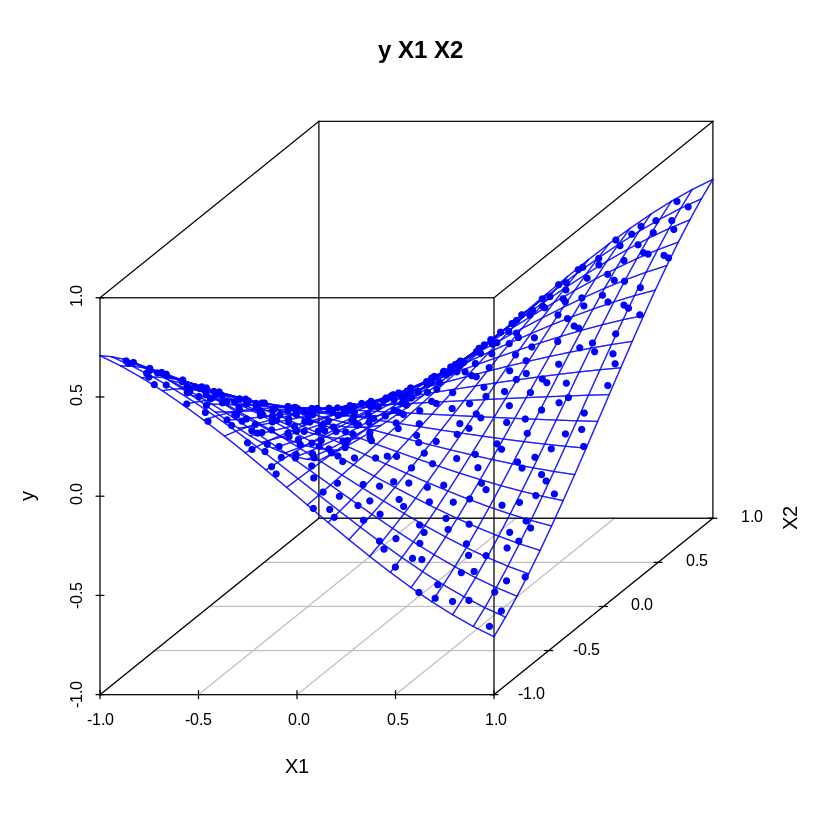

In [ ]:
#install.packages("DiceView")
DiceView::sectionview3d(function(x)prod(sin(x)),center=c(0,0),Xlim=c(-1,1),engine="scatterplot3d")
DiceView::sectionview3d(X=as.matrix(design),y=outputs,add=TRUE,col='blue')

We can first perform quantization without considering the probabilistic distribution of the inputs. This is classical K-means quantization.

In [ ]:
res_proto = proto_map_algo(nb_cells = 4, outputs = outputs, multistart = 6) 
#res_proto

-0.392012
-0.06081331
0.166615
0.4448446


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" is not a graphical parameter”


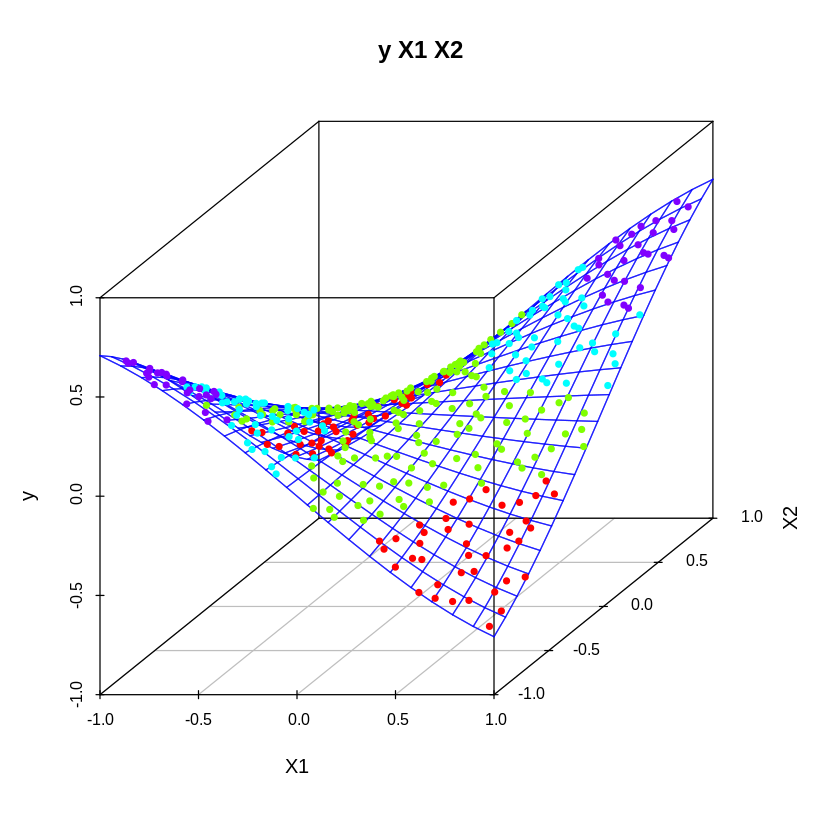

In [ ]:
#install.packages("DiceView")
DiceView::sectionview3d(function(x)prod(sin(x)),center=c(0,0),Xlim=c(-1,1),engine="scatterplot3d")
cols=rainbow(4)
for (i in 1:4) {
  design_i = as.matrix(design)[res_proto$cell_numbers==i,]
  outputs_i = outputs[res_proto$cell_numbers==i]
  DiceView::sectionview3d(X=design_i,y=outputs_i,col=cols[i],add=TRUE)
}

We can also consider the probabilistic distribution of the inputs.

In [ ]:
f2 = function(x){
  res = 0
  ptrunc = pgev(-1, loc=-0.4,scale=0.1) + 1 - pgev(1, loc=-0.4,scale=0.1)
  if(x>=-1 & x < 1){res = dgev(x, loc=-0.4,scale=0.1)/(1-ptrunc)}
  return(res)
}
f1 = function(x){
  if(x > -1 & x < 1){return(1/2)}
  else{return(0)}
}
fX = function(x){f1(x[1])*f2(x[2])}

The design of experiments is a sobol sequence that can be considered as a uniform distribution, which is often the case.

In [ ]:
g = function(x){
  if(sum(x > -1) == length(x) & sum(x < 1) == length(x)){return(1/4)}
  else{return(0)}
}

Then we can perform a probabilistic quantization

In [ ]:
density_ratio = compute_density_ratio(f = fX, g = g, inputs = design)
res_proto_2 = proto_map_algo(nb_cells = 4, outputs = outputs, multistart = 6,density_ratio = density_ratio) 
#res_proto_2

Warning message:
“executing %dopar% sequentially: no parallel backend registered”


-0.2551103
-0.09392641
0.05094865
0.2420916


Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"size" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"zlim" is not a graphical parameter”


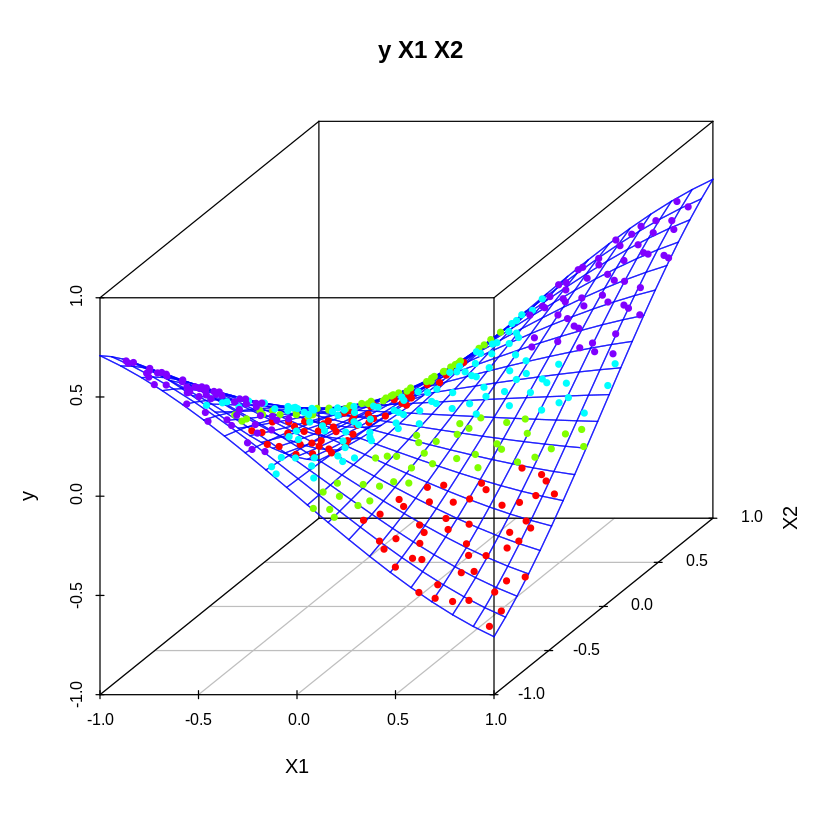

In [ ]:
#install.packages("DiceView")
DiceView::sectionview3d(function(x)prod(sin(x)),center=c(0,0),Xlim=c(-1,1),engine="scatterplot3d")
cols=rainbow(4)
for (i in 1:4) {
  design_i = as.matrix(design)[res_proto_2$cell_numbers==i,]
  outputs_i = outputs[res_proto_2$cell_numbers==i]
  DiceView::sectionview3d(X=design_i,y=outputs_i,col=cols[i],add=TRUE)
}